# Understanding relationship of patient demographics and presence of disease

Miguel Xochicale [@mxochicale](https://github.com/mxochicale), Nhat Phung Tran Huy  [@huynhatd13](https://github.com/huynhatd13), et al.

January, February and March 2022

## 1 Introduction

This notebook presents prototypes for demographic analysis of participants.

### 1.1 Running notebook
Go to echocardiography repository path: `$HOME/repositories/2022-echocardiography-proceedings/`
Open echocardiography repo in pycharm and in the terminal type:
```
git checkout master # or the branch
git pull # to bring a local branch up-to-date with its remote version
```
Launch Notebook server Go to you repository path: `cd $HOME/repositories/2022-echocardiography-proceedings/proceedings/statistica-analysis/` and type in the pycharm terminal:

```
conda activate echo-paper-ve
jupyter notebook
```
which will open your web-browser.

### 1.2 References
* B. Glocker, C. Jones, M. Bernhardt, S. Winzeck. Algorithmic encoding of protected characteristics in image-based models for disease detection. 2021. pre-print arXiv:2110.14755. https://github.com/biomedia-mira/chexploration/tree/main/notebooks added 26JAN2022



# 2. Jupyter Notebook
## 2.1 Setting imports and datasets paths

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data_dir = '../datafiles/'
datatablea_adm_src_anonymised = pd.read_csv(data_dir + 'adm_src_anonymised_generated14March2022.csv')

## 2.1 Loading and filtering dataframe tables


In [2]:
dt_datatable_adm_src_anonymised = pd.DataFrame(datatablea_adm_src_anonymised)
dt_datatable_adm_src_anonymised.head()

,EVENT,USUBJID,STUDYID,SUBJID,T1,T2,T3,WEIGHT,HEIGHT,AGE,...,TAKINGMEDDETAILS.1,TAKINGHERBAL.1,Unnamed: 28,Unnamed: 29,TETANUS,GROUP2,TETANUSAG,CNS_INFECTION,ADMITTEDICU,DURATIONOFICU
0,All,003-002,01NVb,2,NaN,NaN,NaN,50,150,64.0,...,NaN,N,NaN,NaN,True,False,False,False,False,False
1,All,003-003,01NVb,3,NaN,NaN,NaN,52,163,28.0,...,NaN,N,NaN,NaN,True,False,False,False,False,False
2,All,003-004,01NVb,4,NaN,NaN,NaN,60,150,84.0,...,NaN,N,NaN,NaN,False,False,False,False,False,False
3,All,003-006,01NVb,6,NaN,NaN,NaN,39,160,20.0,...,NaN,N,NaN,NaN,False,False,False,False,False,False
4,All,003-008,01NVb,8,NaN,NaN,NaN,51,162,41.0,...,NaN,N,NaN,NaN,True,False,False,False,False,False


## 3. Filtering and creating columns

In [3]:
## Filtering columns
basic_demographics=dt_datatable_adm_src_anonymised.filter(items=[ 'SUBJID', 'SEX', 'WEIGHT', 'HEIGHT', 'AGE', 'SEPSIS', 'DENGUE', 'ADMITTEDICU', 'SMOKER', 'POINTCARE'])
#basic_demographics.head()

###########################
#BMI (WEIGHT (kg)/HEIGH(m)^2)
basic_demographics["HEIGHT"] = basic_demographics["HEIGHT"] /100
basic_demographics["BMI"] =  basic_demographics["WEIGHT"] / (basic_demographics["HEIGHT"] * basic_demographics["HEIGHT"])

basic_demographics['BMI'] = basic_demographics['BMI'].apply(np.ceil)
#basic_demographics['BMI'] = basic_demographics['BMI'].apply(np.ceil).astype(int)

###########################
basic_demographics.tail()


,SUBJID,SEX,WEIGHT,HEIGHT,AGE,SEPSIS,DENGUE,ADMITTEDICU,SMOKER,POINTCARE,BMI
182,310,M,60,1.60,67.0,False,False,True,N,False,24.0
183,311,M,72,1.70,66.0,False,False,True,N,NaN,25.0
184,312,M,60,1.65,72.0,False,False,True,Y,False,23.0
185,313,F,45,1.55,24.0,False,False,True,N,False,19.0
186,314,M,65,1.60,69.0,False,False,True,Y,False,26.0


=================== AGE DISTRIBUTION =======================


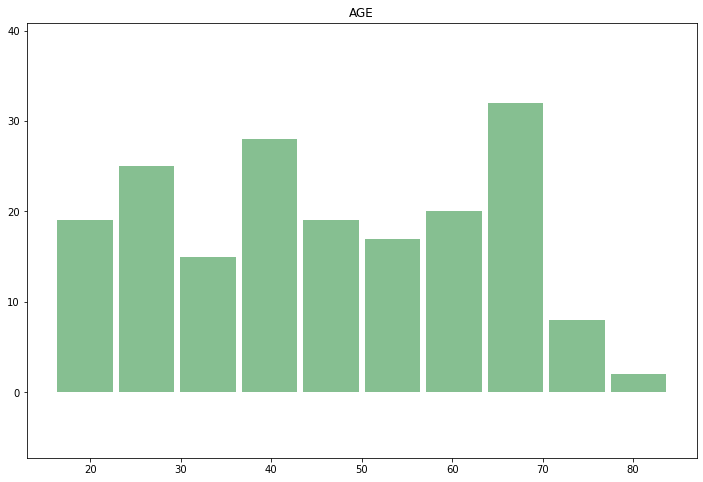

In [4]:
print(f'=================== AGE DISTRIBUTION =======================')
#Subjet Length: 187
basic_demographics.hist(column='AGE', bins=10, figsize=(12,8), grid=False, color='#86bf91', zorder=2, rwidth=0.9)
plt.axis('equal')
plt.show()


=================== GENDER =======================


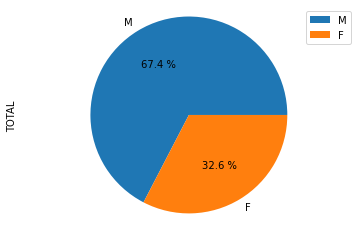

0      F
1      M
2      F
3      F
4      M
      ..
182    M
183    M
184    M
185    F
186    M
Name: SEX, Length: 187, dtype: object

In [5]:
print(f'=================== GENDER =======================')
basic_demographics['SEX'].value_counts().plot.pie(autopct='%.1f %%', ylabel='TOTAL', legend=True)
plt.axis('equal')
plt.show()

basic_demographics['SEX']




=================== GENDER, SEPSIS =======================


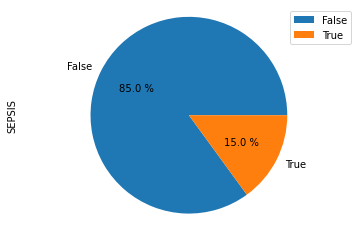

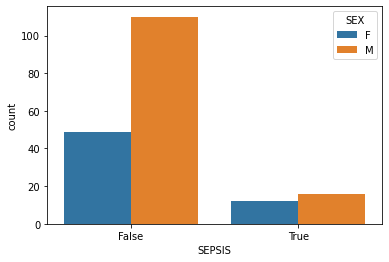

In [6]:
print(f'=================== GENDER, SEPSIS =======================')
basic_demographics['SEPSIS'].value_counts().plot.pie(autopct='%.1f %%', ylabel='SEPSIS', legend=True)
plt.axis('equal')
plt.show()

sns.countplot(data=basic_demographics,x='SEPSIS',hue='SEX')
plt.show()



=================== GENDER, DENGUE =======================


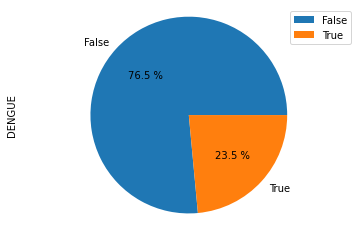

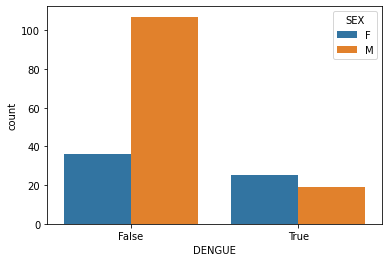

In [7]:
print(f'=================== GENDER, DENGUE =======================')

basic_demographics['DENGUE'].value_counts().plot.pie(autopct='%.1f %%', ylabel='DENGUE', legend=True)
plt.axis('equal')
plt.show()

sns.countplot(data=basic_demographics,x='DENGUE',hue='SEX')
plt.show()


=================== GENDER, ADMITTEDICU =======================


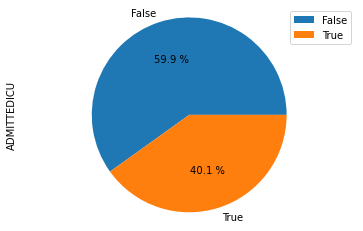

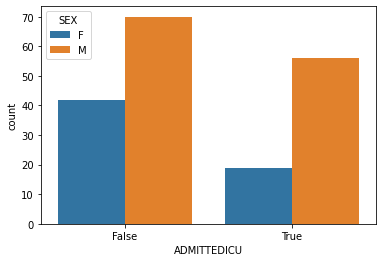

In [8]:
print(f'=================== GENDER, ADMITTEDICU =======================')

basic_demographics['ADMITTEDICU'].value_counts().plot.pie(autopct='%.1f %%', ylabel='ADMITTEDICU', legend=True)
plt.axis('equal')
plt.show()

sns.countplot(data=basic_demographics,x='ADMITTEDICU',hue='SEX')
plt.show()



=================== GENDER, SMOKER =======================


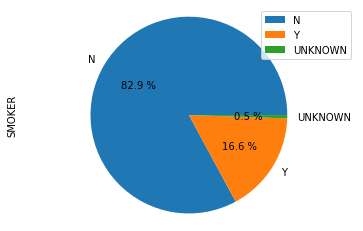

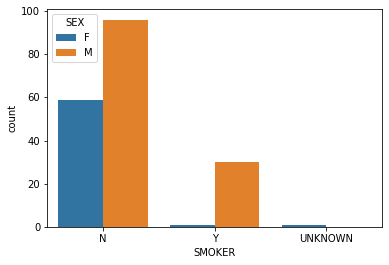

In [9]:
print(f'=================== GENDER, SMOKER =======================')
basic_demographics['SMOKER'].value_counts().plot.pie(autopct='%.1f %%', ylabel='SMOKER', legend=True)
plt.axis('equal')
plt.show()

sns.countplot(data=basic_demographics,x='SMOKER',hue='SEX')
plt.show()



=================== GENDER, POINTCARE =======================


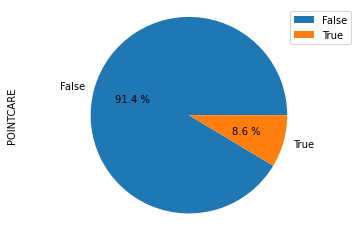

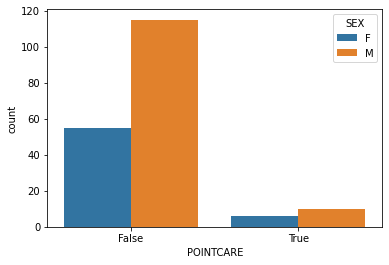

In [10]:
print(f'=================== GENDER, POINTCARE =======================')

basic_demographics['POINTCARE'].value_counts().plot.pie(autopct='%.1f %%', ylabel='POINTCARE', legend=True)
plt.axis('equal')
plt.show()

sns.countplot(data=basic_demographics,x='POINTCARE',hue='SEX')
plt.show()

=================== Body Mass Index =======================


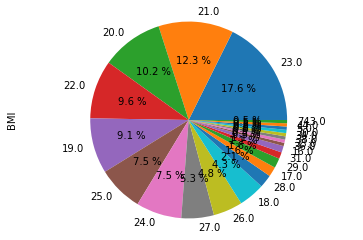

In [11]:
print(f'=================== Body Mass Index =======================')
basic_demographics['BMI'].value_counts().plot.pie(autopct='%.1f %%', ylabel='BMI', legend=False)
plt.axis('equal')
plt.show()
## Few evidence on Body mass index (BMI) dynamics in vietnam
# https://www.nature.com/articles/1602675


=================== Body Mass Index plots for participants with/without SEPSIS =======================


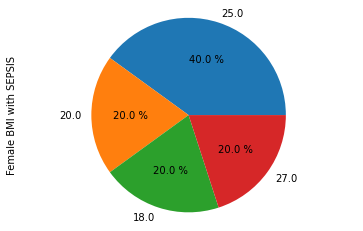

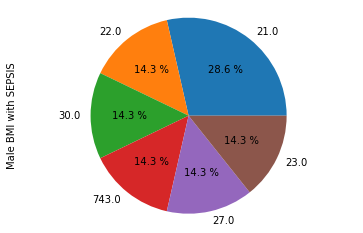

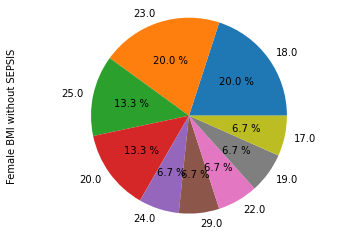

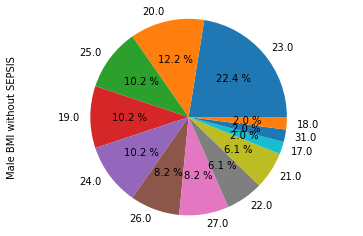

In [12]:
print(f'=================== Body Mass Index plots for participants with/without SEPSIS =======================')

AGE_LIMIT = 50
bdA = basic_demographics[(basic_demographics["AGE"] > AGE_LIMIT) & 
                         (basic_demographics["SEX"] =='F') & 
                         (basic_demographics["SEPSIS"] == 1)  ]
bdA['BMI'].value_counts().plot.pie(autopct='%.1f %%', ylabel='Female BMI with SEPSIS', legend=False)
plt.axis('equal')
plt.show()

bdA = basic_demographics[ (basic_demographics["AGE"] > AGE_LIMIT) & 
                         (basic_demographics["SEX"] =='M') & 
                         (basic_demographics["SEPSIS"] == 1)  ]
bdA['BMI'].value_counts().plot.pie(autopct='%.1f %%', ylabel='Male BMI with SEPSIS', legend=False)
plt.axis('equal')
plt.show()

bdA = basic_demographics[ (basic_demographics["AGE"] > AGE_LIMIT) & 
                         (basic_demographics["SEX"] =='F') & 
                         (basic_demographics["SEPSIS"] == 0)  ]
bdA['BMI'].value_counts().plot.pie(autopct='%.1f %%', ylabel='Female BMI without SEPSIS', legend=False)
plt.axis('equal')
plt.show()

bdA = basic_demographics[ (basic_demographics["AGE"] > AGE_LIMIT) & 
                         (basic_demographics["SEX"] =='M') & 
                         (basic_demographics["SEPSIS"] == 0)  ]
bdA['BMI'].value_counts().plot.pie(autopct='%.1f %%', ylabel='Male BMI without SEPSIS', legend=False)
plt.axis('equal')
plt.show()



=================== Body Mass Index plots for participants with/without DENGUE =======================


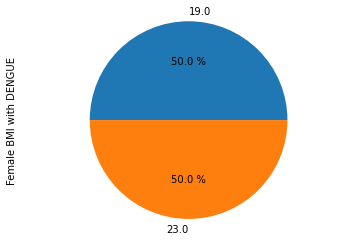

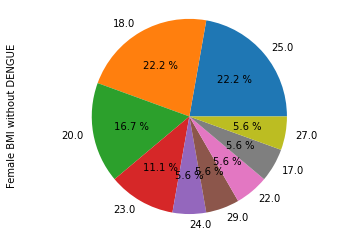

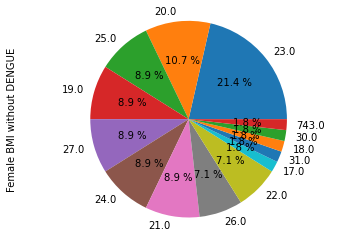

In [13]:
print(f'=================== Body Mass Index plots for participants with/without DENGUE =======================')
AGE_LIMIT = 50

bdA = basic_demographics[ (basic_demographics["AGE"] > AGE_LIMIT) & 
                         (basic_demographics["SEX"] =='F') & 
                         (basic_demographics["DENGUE"] == 1)  ]
bdA['BMI'].value_counts().plot.pie(autopct='%.1f %%', ylabel='Female BMI with DENGUE', legend=False)
plt.axis('equal')
plt.show()

bdA = basic_demographics[ (basic_demographics["AGE"] > AGE_LIMIT) & 
                         (basic_demographics["SEX"] =='F') & 
                         (basic_demographics["DENGUE"] == 0)  ]
bdA['BMI'].value_counts().plot.pie(autopct='%.1f %%', ylabel='Female BMI without DENGUE', legend=False)
plt.axis('equal')
plt.show()


# bdA = basic_demographics[ (basic_demographics["AGE"] > AGE_LIMIT) & 
#                          (basic_demographics["SEX"] =='M') & 
#                          (basic_demographics["DENGUE"] == 1)  ]
# bdA['BMI'].value_counts().plot.pie(autopct='%.1f %%', ylabel='Female BMI with DENGUE', legend=False)
# plt.axis('equal')
#plt.show()

bdA = basic_demographics[ (basic_demographics["AGE"] > AGE_LIMIT) & 
                         (basic_demographics["SEX"] =='M') & 
                         (basic_demographics["DENGUE"] == 0)  ]
bdA['BMI'].value_counts().plot.pie(autopct='%.1f %%', ylabel='Female BMI without DENGUE', legend=False)
plt.axis('equal')
plt.show()




In [14]:
## TODO
## * GENDER, AGE_GROUP, BMI (WEIGHT/HEIGH^2)
## * 4CV T1,T2,T3